In [2]:
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

In [11]:
# transformations to be applied to raw data
# converts (PIL, target) to (tensor, target)
transform = transforms.Compose([
    transforms.ToTensor(), 
])

# load datsets from Internet
trainset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
testset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

# provide an iterable over datasets
trainloader = DataLoader(dataset=trainset, batch_size=32, shuffle=True)
testloader = DataLoader(dataset=testset, batch_size=32, shuffle=True)

In [7]:
# model sucks on binary for some reason, create custom Transform object to binarize images

class Binarize():
    def __call__(self, sample):
        return (sample > 0.5).float()

transform = transforms.Compose([
    transforms.ToTensor(), 
    Binarize()
])

# load datsets from Internet
b_trainset = datasets.MNIST(root='./binarized', train=True, download=True, transform=transform)
b_testset = datasets.MNIST(root='./binarized', train=False, download=True, transform=transform)

b_trainloader = DataLoader(dataset=b_trainset, batch_size=32, shuffle=True)
b_testloader = DataLoader(dataset=b_testset, batch_size=32, shuffle=True)

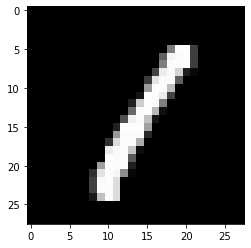

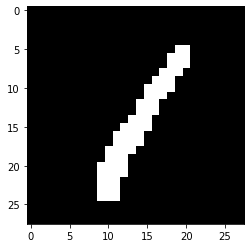

In [23]:
import matplotlib.pyplot as plt

plt.imshow(trainset[3][0].squeeze(), cmap='gray')
plt.show()
plt.imshow(b_trainset[3][0].squeeze(), cmap='gray')
plt.show()

In [16]:
import torch.nn as nn
import torch.nn.functional as F

class BobNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(784, 128)
        self.fc2 = nn.Linear(128, 128)
        self.fc3 = nn.Linear(128, 10)
    
    def forward(self, x):
        # flatten all dimensions, except the batch dimension.
        x = torch.flatten(x, start_dim=1)
        x = self.fc1(x)
        x = F.relu(x)
        x = self.fc2(x)
        x = F.relu(x)
        x = self.fc3(x)
        # process output of net into probabilities
        out = F.log_softmax(x, dim=1)
        return out

model = BobNet()

In [17]:
import torch.optim as optim

optimizer = optim.SGD(params=model.parameters(), lr = 0.001)

In [ ]:
# training loop
model.train()
for epoch in range(10):
    for batch_ix, (data, target) in enumerate(b_trainloader):
        
        # forward thru the model and compute loss
        preds = model(data)
        optimizer.zero_grad()
        loss = F.cross_entropy(preds, target)

        # backward pass
        loss.backward()

        cat = torch.argmax(preds, axis = 1)
        acc = (cat == target).float().mean()

        # update
        optimizer.step()
        print(f'epoch: {epoch}, batch: {batch_ix}, loss: {loss}, acc: {acc}')
        
# save the model
torch.save(model.state_dict(), "model.pt")

tensor(3)

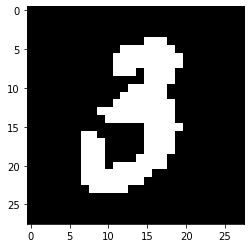

In [41]:
# test out model
model.eval()
ix = torch.randint(low=0, high=len(b_testset), size=(1,)).item()
test = b_trainset[ix][0]
plt.imshow(test.squeeze(), cmap='gray')
torch.argmax(model(test))

In [42]:
# save the model
torch.save(model.state_dict(), "model.pt")